In [96]:
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import tensorboard as tb
import pandas as pd

In [97]:
experiment = tb.data.experimental.ExperimentFromDev("Say2oRrHRGmTJtQyOeSbCw")
df = experiment.get_scalars()
df

,run,tag,step,value
0,train60adam,metrics/mAP_0.5,0,0.008880
1,train60adam,metrics/mAP_0.5,1,0.006239
2,train60adam,metrics/mAP_0.5,2,0.009425
3,train60adam,metrics/mAP_0.5,3,0.009319
4,train60adam,metrics/mAP_0.5,4,0.011177
...,...,...,...,...
34783,train_80_mixup,x/lr2,215,0.002938
34784,train_80_mixup,x/lr2,216,0.002905
34785,train_80_mixup,x/lr2,217,0.002872
34786,train_80_mixup,x/lr2,218,0.002839


In [98]:
import csv
import os
import numpy as np

train_box_loss = {}
train_obj_loss = {}
train_cls_loss = {}
val_box_loss = {}
val_obj_loss = {}
val_cls_loss = {}
precision = {}
recall = {}
mAP_05 = {}
mAP_05_95 = {}

for subdir in os.listdir("."):
    if "train" in subdir and "Adam" not in subdir:
        isHeader = True
        train_box_loss[subdir] = np.zeros(300)
        train_obj_loss[subdir] = np.zeros(300)
        train_cls_loss[subdir] = np.zeros(300)
        val_box_loss[subdir] = np.zeros(300)
        val_obj_loss[subdir] = np.zeros(300)
        val_cls_loss[subdir] = np.zeros(300)
        precision[subdir] = np.zeros(300)
        recall[subdir] = np.zeros(300)
        mAP_05[subdir] = np.zeros(300)
        mAP_05_95[subdir] = np.zeros(300)

        with open(os.path.join(subdir, "results.csv"), "r") as f:
            csv_reader = csv.reader(f, delimiter=',')
            for row in csv_reader:
                if isHeader:
                    isHeader = False
                    continue
                else:
                    epoch = int(row[0])
                    train_box_loss[subdir][epoch] = float(row[1])
                    train_obj_loss[subdir][epoch] = float(row[2])
                    train_cls_loss[subdir][epoch] = float(row[3])
                    val_box_loss[subdir][epoch] = float(row[8])
                    val_obj_loss[subdir][epoch] = float(row[9])
                    val_cls_loss[subdir][epoch] = float(row[10])
                    precision[subdir][epoch] = float(row[4])
                    recall[subdir][epoch] = float(row[5])
                    mAP_05[subdir][epoch] = float(row[6])
                    mAP_05_95[subdir][epoch] = float(row[7])

In [99]:
start_idx = {}
for _, (k, v) in enumerate(train_box_loss.items()):
    start_idx[k] = int(np.min(np.nonzero(v)))
print(start_idx)

{'train_80_mixup': 0, 'train_50_mixup': 0, 'train_70_mixup': 235, 'train_50': 0, 'train_60': 82, 'train_70': 0, 'train_60_mixup': 160, 'train_80': 113}


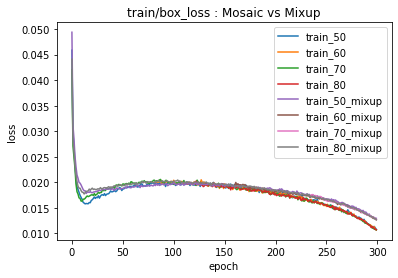

In [100]:
keys = ['train_50', 'train_60', 'train_70', 'train_80', 
        'train_50_mixup', 'train_60_mixup', 'train_70_mixup', 'train_80_mixup']
plt.figure()
for key in keys:
    plt.plot(range(start_idx[key], 300), train_box_loss[key][start_idx[key] : ])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("train/box_loss : Mosaic vs Mixup")
plt.legend(keys)
plt.savefig("train_box_loss : Mosaic vs Mixup.jpg", bbox_inches='tight', dpi=100)
plt.show()

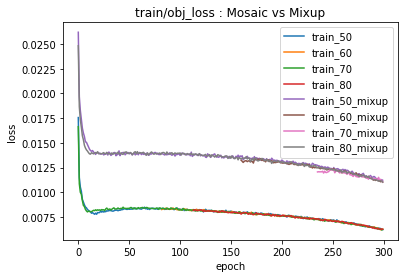

In [101]:
plt.figure()
for key in keys:
    plt.plot(range(start_idx[key], 300), train_obj_loss[key][start_idx[key] : ])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("train/obj_loss : Mosaic vs Mixup")
plt.legend(keys)
plt.savefig("train_obj_loss : Mosaic vs Mixup.jpg", bbox_inches='tight', dpi=100)
plt.show()

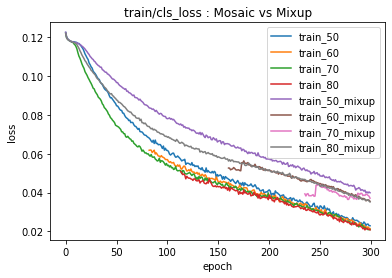

In [102]:
plt.figure()
for key in keys:
    plt.plot(range(start_idx[key], 300), train_cls_loss[key][start_idx[key] : ])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("train/cls_loss : Mosaic vs Mixup")
plt.legend(keys)
plt.savefig("train_cls_loss : Mosaic vs Mixup.jpg", bbox_inches='tight', dpi=100)
plt.show()

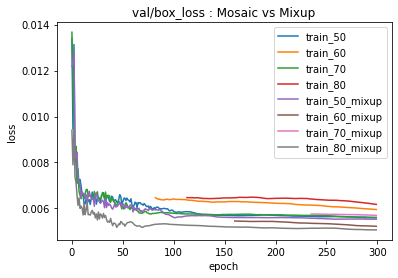

In [103]:
plt.figure()
for key in keys:
    plt.plot(range(start_idx[key], 300), val_box_loss[key][start_idx[key] : ])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("val/box_loss : Mosaic vs Mixup")
plt.legend(keys)
plt.savefig("val_box_loss : Mosaic vs Mixup.jpg", bbox_inches='tight', dpi=100)
plt.show()

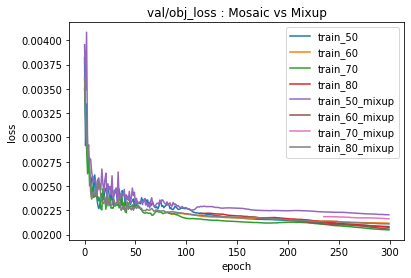

In [104]:
plt.figure()
for key in keys:
    plt.plot(range(start_idx[key], 300), val_obj_loss[key][start_idx[key] : ])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("val/obj_loss : Mosaic vs Mixup")
plt.legend(keys)
plt.savefig("val_obj_loss : Mosaic vs Mixup.jpg", bbox_inches='tight', dpi=100)
plt.show()

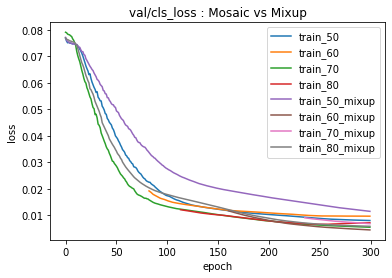

In [105]:
plt.figure()
for key in keys:
    plt.plot(range(start_idx[key], 300), val_cls_loss[key][start_idx[key] : ])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("val/cls_loss : Mosaic vs Mixup")
plt.legend(keys)
plt.savefig("val_cls_loss : Mosaic vs Mixup.jpg", bbox_inches='tight', dpi=100)
plt.show()

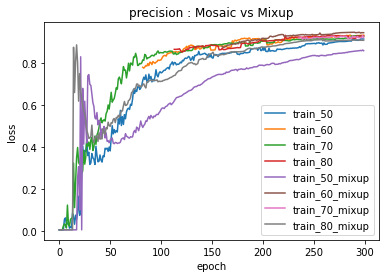

In [106]:
plt.figure()
for key in keys:
    plt.plot(range(start_idx[key], 300), precision[key][start_idx[key] : ])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("precision : Mosaic vs Mixup")
plt.legend(keys)
plt.savefig("precision : Mosaic vs Mixup.jpg", bbox_inches='tight', dpi=100)
plt.show()

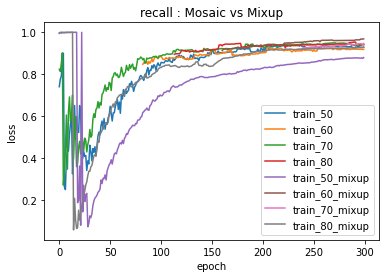

In [107]:
plt.figure()
for key in keys:
    plt.plot(range(start_idx[key], 300), recall[key][start_idx[key] : ])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("recall : Mosaic vs Mixup")
plt.legend(keys)
plt.savefig("recall : Mosaic vs Mixup.jpg", bbox_inches='tight', dpi=100)
plt.show()

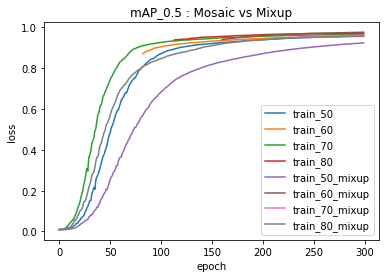

In [108]:
plt.figure()
for key in keys:
    plt.plot(range(start_idx[key], 300), mAP_05[key][start_idx[key] : ])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("mAP_0.5 : Mosaic vs Mixup")
plt.legend(keys)
plt.savefig("mAP_0.5 : Mosaic vs Mixup.jpg", bbox_inches='tight', dpi=100)
plt.show()

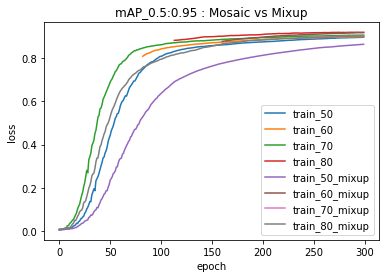

In [109]:
plt.figure()
for key in keys:
    plt.plot(range(start_idx[key], 300), mAP_05_95[key][start_idx[key] : ])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("mAP_0.5:0.95 : Mosaic vs Mixup")
plt.legend(keys)
plt.savefig("mAP_0.5:0.95 : Mosaic vs Mixup.jpg", bbox_inches='tight', dpi=100)
plt.show()

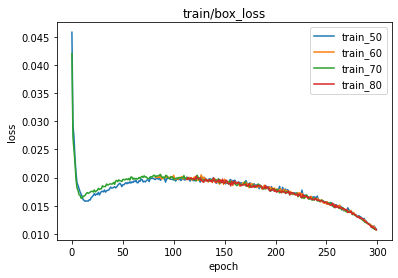

In [110]:
plt.figure()
for key in keys:
    if 'mixup' not in key:
        plt.plot(range(start_idx[key], 300), train_box_loss[key][start_idx[key] : ])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("train/box_loss")
plt.legend(keys)
plt.savefig("train_box_loss.jpg", bbox_inches='tight', dpi=100)
plt.show()

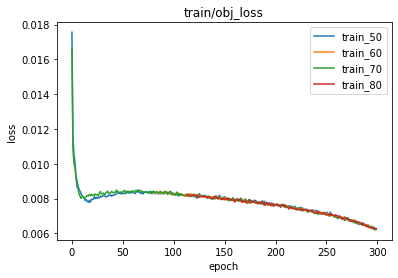

In [111]:
plt.figure()
for key in keys:
    if 'mixup' not in key:
        plt.plot(range(start_idx[key], 300), train_obj_loss[key][start_idx[key] : ])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("train/obj_loss")
plt.legend(keys)
plt.savefig("train_obj_loss.jpg", bbox_inches='tight', dpi=100)
plt.show()

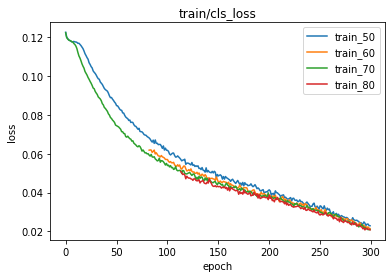

In [112]:
plt.figure()
for key in keys:
    if 'mixup' not in key:
        plt.plot(range(start_idx[key], 300), train_cls_loss[key][start_idx[key] : ])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("train/cls_loss")
plt.legend(keys)
plt.savefig("train_cls_loss.jpg", bbox_inches='tight', dpi=100)
plt.show()

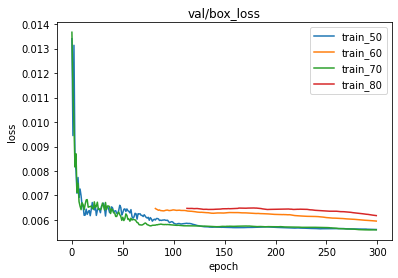

In [113]:
plt.figure()
for key in keys:
    if 'mixup' not in key:
        plt.plot(range(start_idx[key], 300), val_box_loss[key][start_idx[key] : ])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("val/box_loss")
plt.legend(keys)
plt.savefig("val_box_loss.jpg", bbox_inches='tight', dpi=100)
plt.show()

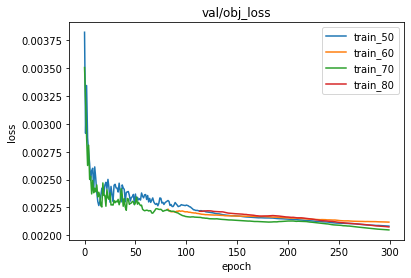

In [114]:
plt.figure()
for key in keys:
    if 'mixup' not in key:
        plt.plot(range(start_idx[key], 300), val_obj_loss[key][start_idx[key] : ])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("val/obj_loss")
plt.legend(keys)
plt.savefig("val_obj_loss.jpg", bbox_inches='tight', dpi=100)
plt.show()

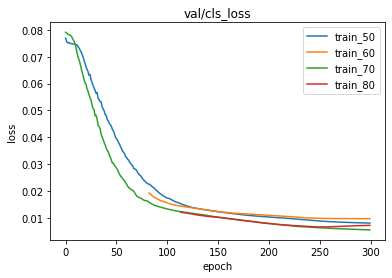

In [115]:
plt.figure()
for key in keys:
    if 'mixup' not in key:
        plt.plot(range(start_idx[key], 300), val_cls_loss[key][start_idx[key] : ])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("val/cls_loss")
plt.legend(keys)
plt.savefig("val_cls_loss.jpg", bbox_inches='tight', dpi=100)
plt.show()

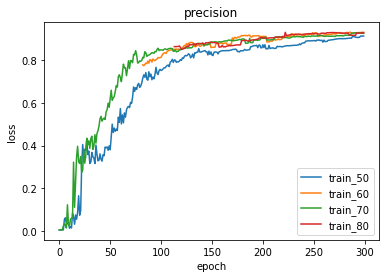

In [116]:
plt.figure()
for key in keys:
    if 'mixup' not in key:
        plt.plot(range(start_idx[key], 300), precision[key][start_idx[key] : ])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("precision")
plt.legend(keys)
plt.savefig("precision.jpg", bbox_inches='tight', dpi=100)
plt.show()

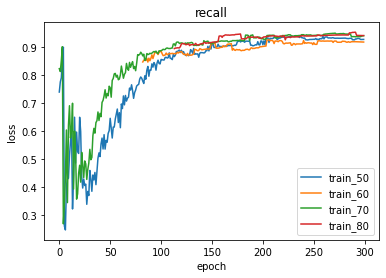

In [117]:
plt.figure()
for key in keys:
    if 'mixup' not in key:
        plt.plot(range(start_idx[key], 300), recall[key][start_idx[key] : ])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("recall")
plt.legend(keys)
plt.savefig("recall.jpg", bbox_inches='tight', dpi=100)
plt.show()

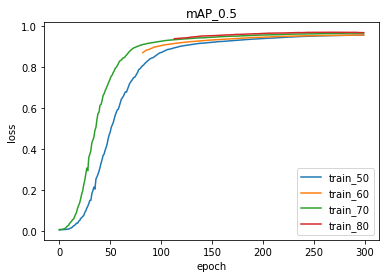

In [118]:
plt.figure()
for key in keys:
    if 'mixup' not in key:
        plt.plot(range(start_idx[key], 300), mAP_05[key][start_idx[key] : ])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("mAP_0.5")
plt.legend(keys)
plt.savefig("mAP_0.5.jpg", bbox_inches='tight', dpi=100)
plt.show()

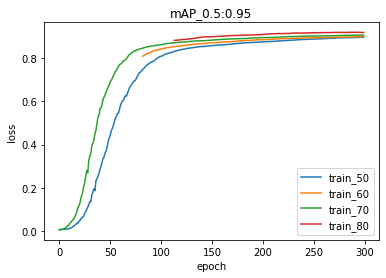

In [119]:
plt.figure()
for key in keys:
    if 'mixup' not in key:
        plt.plot(range(start_idx[key], 300), mAP_05_95[key][start_idx[key] : ])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("mAP_0.5:0.95")
plt.legend(keys)
plt.savefig("mAP_0.5:0.95.jpg", bbox_inches='tight', dpi=100)
plt.show()